# Import libraries
- numpy - for fast computations
- scipy - for loading matlab files (.mat extension)
- matplotlib - for plotting images

In [1]:
import numpy as np
from numpy.linalg import svd
from scipy.io import loadmat
import matplotlib.pyplot as plt

# Define Main Functions

- featureNormalize - which normalizes matrix values to be normally distributed (Mean=0, STD=1)
- pca - does Singular Value Decomposition and calculates pca for given matrix
- projectData - projects data on basis which consists of top K meaningful Eigenvectors
- recoverData - recovers data after projection and generates image approximations

In [2]:
def featureNormalize(X):
    """
    Returns a normalized version of X where the mean value of each feature is 0 and the standard deviation is 1.
    """
    # calculates mean and standard deviation
    mu = np.mean(X,axis=0)
    sigma = np.std(X,axis=0)
    
    # normalized each matrix element to have them normally distributed N(0,1) (mean=0, std=1)
    X_norm = (X - mu)/sigma
    
    return X_norm, mu , sigma

In [3]:
def pca(X):
    """
    Computes eigenvectors of the covariance matrix of X
    """
    m,n = X.shape[0], X.shape[1]
    
    sigma = 1/m * X.T @ X
    
    U,S,V = svd(sigma)
    
    return U,S,V

In [4]:
def projectData(X, U, K):
    """
    Computes the reduced data representation when projecting only on to the top k eigenvectors
    """
    m = X.shape[0]
    U_reduced = U[:,:K]
    Z = np.zeros((m,K))
    
    for i in range(m):
        for j in range(K):
            Z[i,j] = X[i,:] @ U_reduced[:,j]
    
    return Z     # Project the data onto K=1 dimension

In [5]:
def recoverData(Z, U, K):
    """
    Recovers an approximation of the original data when using the projected data
    """
    m,n = Z.shape[0],U.shape[0]
    X_rec = np.zeros((m,n))
    U_reduced = U[:,:K]
    
    for i in range(m):
        X_rec[i,:] = Z[i,:] @ U_reduced.T
    
    return X_rec

# Load and visualize the Face image dataset

In [6]:
mat = loadmat("ex7faces.mat")
X = mat["X"]

Each image size is 32x32 and they are flattened in 1024 size vector. We have 5K images in total.

In [8]:
X.shape

(5000, 1024)

## create subplots to show multiple images
1. unflatten image vectors
2. plot images
3. turn off axis to have less noise on plots

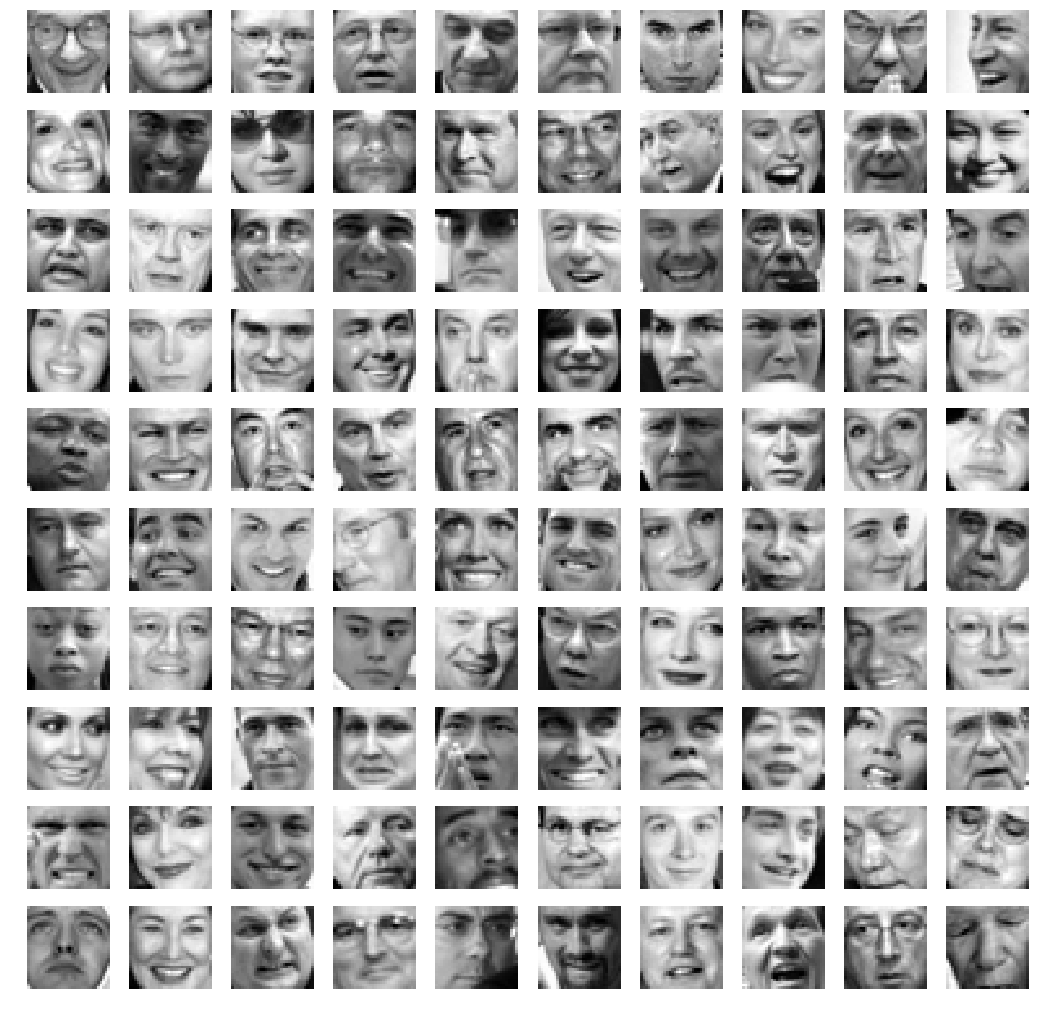

In [9]:
# nrows, ncols define matrix of suplots dimensions (matrix of images to plot)
# figsize defines the size of subplots (entire figure).
fig, ax = plt.subplots(nrows=10,ncols=10,figsize=(18, 18))

for i in range(0,100,10):
    for j in range(10):
        # unflatten 1024 size vector in 32x32 to get right image matrix
        reshaped_image = X[i+j,:].reshape(32,32,order="F")
        
        # show reshaped image
        ax[int(i/10),j].imshow(reshaped_image,cmap="gray")
        
        # axis off to remove unnecessary axis values which is turned on by default
        ax[int(i/10),j].axis("off")

# Normalize matrix of flattened images

In [10]:
X_norm, _ , _ = featureNormalize(X)

### Run PCA

**U** and **V** are **left singular** and **right singular** vectors

**S** is known as singular values vector which in fact is a representation of diagonal matrix

In [12]:
U, S, V = pca(X_norm)

In [14]:
U.shape, S.shape, V.shape

((1024, 1024), (1024,), (1024, 1024))

# Show Singular Values

## All singular values

<BarContainer object of 1024 artists>

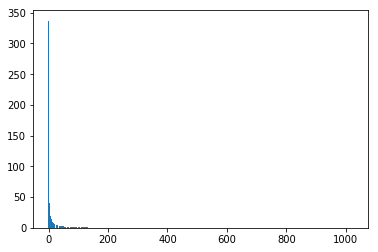

In [19]:
plt.bar(range(S.shape[0]), S)

## Top 50 singular values

<BarContainer object of 50 artists>

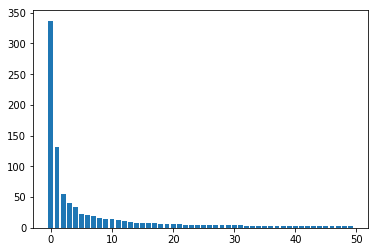

In [20]:
plt.bar(range(50), S[:50])

# Below is the visualization of 36 principal components that describe the largest variations in the dataset

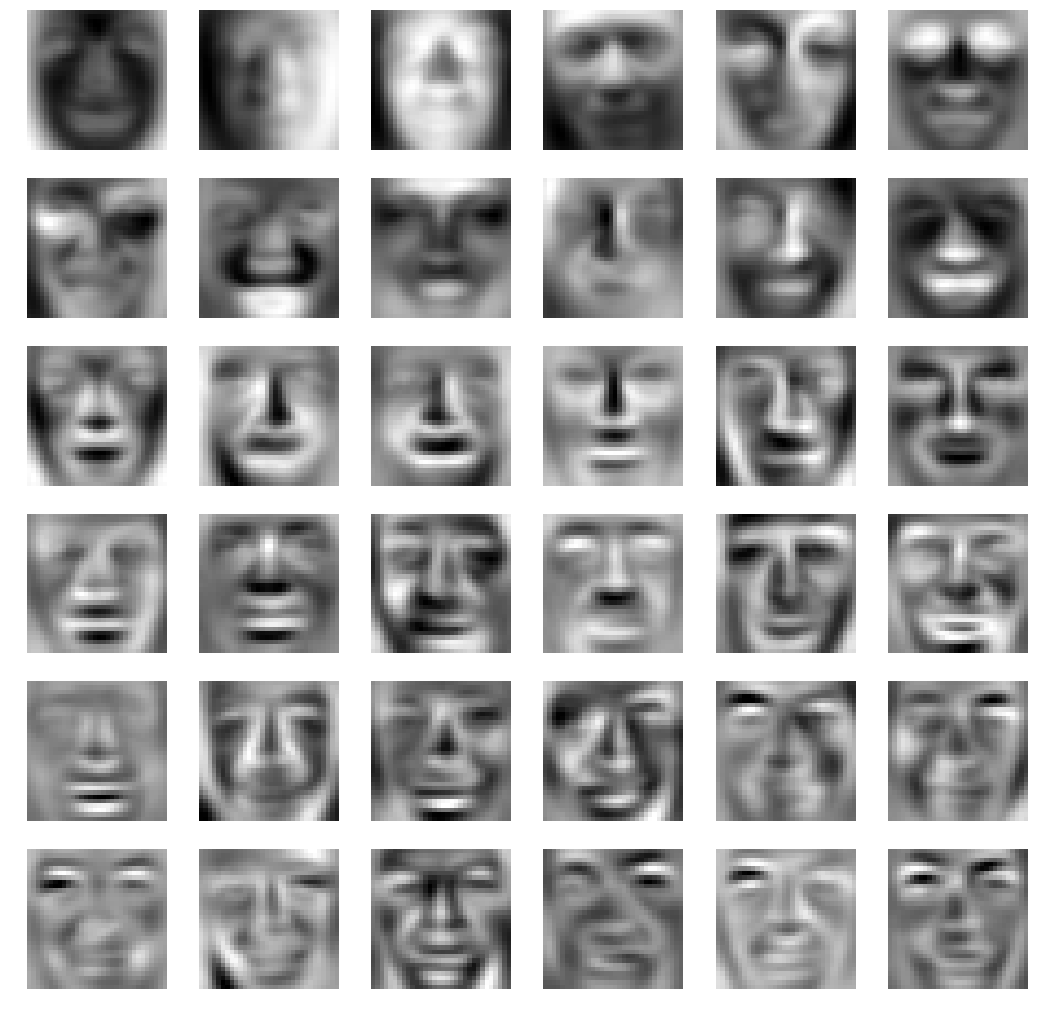

In [21]:
# we are taking first 36 important eigen vectors since we already saw that they 
# are sorted by singular values in decreasing order.
# the higher singular value the higher variation it generates in data. 

U_reduced = U[:,:36].T

# plotting compressed images
fig2, ax2 = plt.subplots(6, 6, figsize=(18,18))

for i in range(0,36,6):
    for j in range(6):
        reshaped_reduced_image = U_reduced[i+j,:].reshape(32,32,order="F")
        ax2[int(i/6),j].imshow(reshaped_reduced_image,cmap="gray")
        ax2[int(i/6),j].axis("off")

# Let's try to take 36 last principal components instead of first. It should give us worst results.

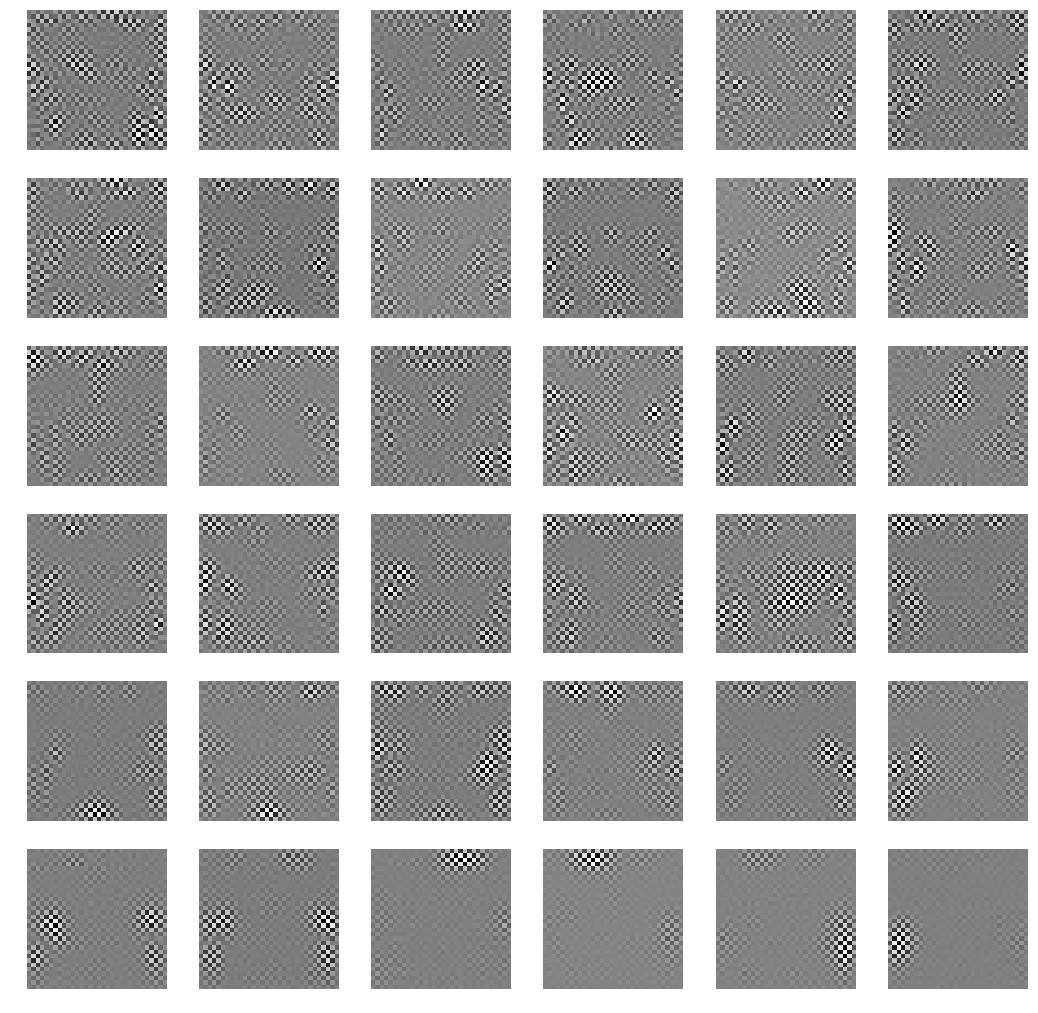

In [26]:
U_reduced = U[:,-36:].T

# plotting compressed images
fig2, ax2 = plt.subplots(6, 6, figsize=(18,18))

for i in range(0,36,6):
    for j in range(6):
        reshaped_reduced_image = U_reduced[i+j,:].reshape(32,32,order="F")
        ax2[int(i/6),j].imshow(reshaped_reduced_image,cmap="gray")
        ax2[int(i/6),j].axis("off")

# Let's project the data onto the first 100 principal components and recover back. Try to understand what is lost in the dimensionality reduction process.

In [23]:
K = 100
Z = projectData(X_norm, U, K)
print("The projected data Z has a size of:", Z.shape)

The projected data Z has a size of: (5000, 100)


### Data reconstruction

In [24]:
X_rec  = recoverData(Z, U, K)

### Visualize the reconstructed data

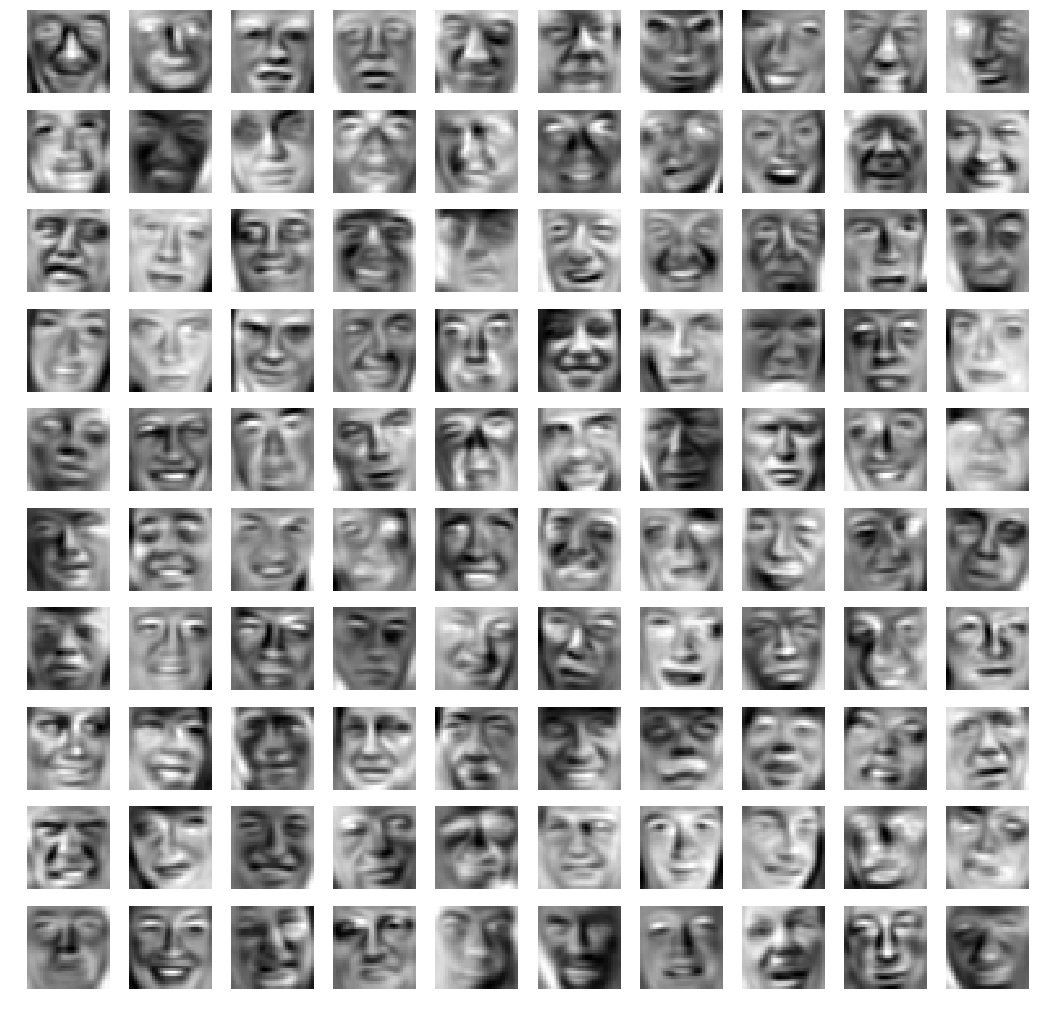

In [25]:
# plot reconstructed images
fig3, ax3 = plt.subplots(10,10,figsize=(18, 18))

for i in range(0,100,10):
    for j in range(10):
        reconstructed_reshaped_img = X_rec[i+j,:].reshape(32,32,order="F")
        ax3[int(i/10),j].imshow(reconstructed_reshaped_img,cmap="gray")
        ax3[int(i/10),j].axis("off")